# Continuous Control

---

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from Agent import Agent 
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

#Initialize agent
agent = Agent(state_size, action_size)

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Train the Agent

We will now train the Agent. This will be donw over a maximum of 5000 episodes. The scores will be stored in a deque to keep the last 100 most recent episdoes. Once the mean of those 100 episodes is greater than or equal to 30.0, the environment is considered solved and will exit the loop, saving the model weights for both the actor and critc neural networks.

C:\ProgramData\Anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
[Episode 100]	Average Score (Last 100 episodes): 2.0
[Episode 200]	Average Score (Last 100 episodes): 7.5
[Episode 300]	Average Score (Last 100 episodes): 11.4
[Episode 400]	Average Score (Last 100 episodes): 17.5
[Episode 500]	Average Score (Last 100 episodes): 22.0
[Episode 600]	Average Score (Last 100 episodes): 24.5
[Episode 700]	Average Score (Last 100 episodes): 24.9
[Episode 776]	Average Score (Last 100 episodes): 30.1

Solved in 775 episodes!	Average Score (Last 100 episodes)=30.1


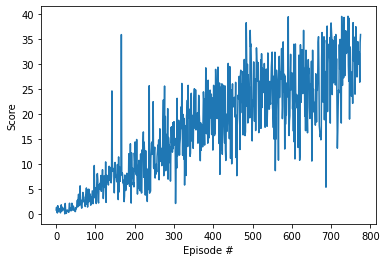

In [5]:

n_episodes = 5000
max_t = 1000
scores_window = deque(maxlen=100)
all_scores = []
for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state per agent
    scores = np.zeros(num_agents)                          # zero out scores per agent
    agent.reset_noise()                                    # reset noise for each episode
    for t in range(max_t):
        actions = agent.get_action(states, add_noise=True) # Get the agent action, add noise to improve learning
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state per agent
        rewards = env_info.rewards                         # get reward for per agent
        dones = env_info.local_done                        # see if episode finished
        agent.step(states, actions, rewards, next_states, dones, t) # Train the agent
        states = next_states                               # set state to next_state for the next action
        scores += rewards                                  # sum up the accumulated rewards
        if np.any(dones):                                  # exit loop if episode finished
            break
    
    all_scores.append(np.mean(scores))                     # save all scores
    scores_window.append(np.mean(scores))                  # calculate moving window of mean scores
    

    if i_episode % 100 == 0:
        print('\r[Episode {}]\tAverage Score (Last 100 episodes): {:.1f}'.format(i_episode, np.mean(scores_window)))
    
    if np.mean(scores_window) >= 30 and i_episode >= 100:                              # if we've solved, print results, save trained networks and break from the loop
            print('\r[Episode {}]\tAverage Score (Last 100 episodes): {:.1f}'.format(i_episode, np.mean(scores_window)))
            print('\nSolved in {} episodes!\tAverage Score (Last 100 episodes)={:.1f}'.format(i_episode - 1, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')          # save actor 
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')        # save critic 
            break

# plot scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(all_scores)), all_scores)
plt.ylabel('Score')
plt.xlabel("Episode #")
plt.show()

### 4. Running the solved environment
Now that we've solved the environment, play a game back in real time so we can observe the game. 


In [6]:

agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))
env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.get_action(states, add_noise=False)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

C:\ProgramData\Anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
Total score (averaged over agents) this episode: 37.76999915577471


In [6]:
env.close()